# Демодуляция ЧМ-сигналов
# Phase Differentiation Detector

## 1. Phase Differentiation Detector

Наиболее популярным цифровым способом демодуляции ЧМ-сигнала является приемник на основе Delay Line Detector. Однако, он имеет один недостаток. Для его реализации необходимо находить аргумент комплексного числа. Обычно для этого нужно вычислять арктангенс, что явялется дорогостоящей операцией с точки зрения аппаратуры. 

Другой способ демодуляции, не требующий находить арктангенс числа, основан на вычислении производной от фазы. Такой демодулятор называется Phase Differentiation Detector.

Будем считать, что прием сигнала осуществляется квадратурным способом. Тогда принятый комплексный сигнал можем представить в виде:

$$s\left(t\right)=A_с \cdot \exp^{j\cdot \left(2\pi f_с t+2\pi K_f \cdot \int_{-\infty }^t m\left(\tau \right)\cdot d\tau \right)} =A_с \cdot \exp^{j\cdot \theta \left(t\right)} \ldotp$$

Фазу сигнала $s\left(t\right)$ можно рассчитать следующим образом:

$$\theta \left(t\right)=\textrm{atan}\left(\frac{\textrm{Im}\left\lbrace s\left(t\right)\right\rbrace }{\textrm{Re}\left\lbrace s\left(t\right)\right\rbrace }\right)=\textrm{atan}\left(\frac{s_i \left(t\right)}{s_r \left(t\right)}\right)=\textrm{atan}\left(x\right),$$

где $\textrm{Re}\left\lbrace s\left(t\right)\right\rbrace =s_r \left(t\right)$ и $\textrm{Im}\left\lbrace s\left(t\right)\right\rbrace =s_i \left(t\right)$- действительная и мнимая часть сигнала.

Вычислим в явном виде производную от фазы $\theta \left(t\right)$:

$$\frac{d}{\textrm{dt}}\theta \left(t\right)=\frac{1}{1+x^2 }\cdot \frac{\textrm{dx}}{\textrm{dt}}=\frac{s_r^2 \left(t\right)}{s_r^2 \left(t\right)+s_i^2 \left(t\right)}\cdot \frac{d}{\textrm{dt}}\frac{s_i \left(t\right)}{s_r \left(t\right)}=\frac{s_r^2 \left(t\right)}{s_r^2 \left(t\right)+s_i^2 \left(t\right)}\cdot \frac{s_i \left(t\right)s_r^{\prime } \left(t\right)-s_r \left(t\right)s_i^{\prime } \left(t\right)}{s_r^2 \left(t\right)}=$$

$$=\frac{s_i \left(t\right)s_r^{\prime } \left(t\right)-s_r \left(t\right)s_i^{\prime } \left(t\right)}{s_r^2 \left(t\right)+s_i^2 \left(t\right)}=\frac{s_i \left(t\right)s_r^{\prime } \left(t\right)-s_r \left(t\right)s_i^{\prime } \left(t\right)}{{\left|s\left(t\right)\right|}^2 }\cdot$$

Заметим, что числитель дроби можно выразить через произведение комплексного сигнала и его производной в следующем виде:

$$\frac{d}{\textrm{dt}}\theta \left(t\right)=\frac{\textrm{Im}\left\lbrace s^* \left(t\right)\cdot s^{\prime } \left(t\right)\right\rbrace }{{\left|s\left(t\right)\right|}^2 },$$

где $s^{\prime } \left(t\right)$ - производная сигнала, $s^* \left(t\right)$ - сопряженный сигнал.

Подставим в предыдущее уравнение полное выражение для фазы сигнала и получим:

$$\frac{d}{\textrm{dt}}\left(2\pi f_с t+2\pi K_f \cdot \int_{-\infty }^t m\left(\tau \right)\cdot d\tau \right)=2\pi f_с +2\pi K_f \cdot m\left(t\right)=\frac{\textrm{Im}\left\lbrace s^* \left(t\right)\cdot s^{\prime } \left(t\right)\right\rbrace }{{\left|s\left(t\right)\right|}^2 }\ldotp$$

После переноса слагаемых можем записать окончательный результат:

$$K_f \cdot m\left(t\right)=\frac{1}{2\pi }\cdot \frac{\textrm{Im}\left\lbrace s^* \left(t\right)\cdot s^{\prime } \left(t\right)\right\rbrace }{{\left|s\left(t\right)\right|}^2 }-f_с \ldotp$$

Таким образом, Phase Differentiation Detector позволяет получить масштабированную копию информационного сообщения без вычисления операции арктангенса. Схема приемного устройства имеет вид:

<img src="../../images/demodulation_phase_differentiation.png" width=500/>


## 2. Демодуляция аудиосообщения

Рассмотрим демодуляцию аудиосообщения с помощью скрипта, реализующего Phase Differentiation Detector.

В файлах Audio\_FM\_ModIdx\_*.wav записаны частотно-модулированные сигналы с различными индексами модуляции. Частота несущей $f_s$ равна 100 kHz, а частота дискретизации $f_s$ = $441$ kHz. Считаем, что прием выполняется квадратурным способ, то есть сигнал имеет вид:

$$s\left(t\right)=A_с \cdot \exp^{j\cdot \left(2\pi f_с t+2\pi K_f \cdot \int_{-\infty }^t m\left(\tau \right)\cdot d\tau \right)} \ldotp$$

Для демодуляции информационного сообщения нам необходимо вычислить значение следующей дроби:

$$\frac{d}{\textrm{dt}}\theta \left(t\right)=\frac{\textrm{Im}\left\lbrace s^* \left(t\right)\cdot s^{\prime } \left(t\right)\right\rbrace }{{\left|s\left(t\right)\right|}^2 },$$

Для этого сначала приближенно находим производные действительной и мнимой части с помощью вычисления разности между соседними отсчетами. Для этого задерживаем полученную пачку (frame) отсчетов на один отсчет и вычитаем ее из текущей пачки отсчтетов. Далее находим комплексное сопряжение отсчетов, умножаем их на производную и берем мнимую часть. Так мы получаем числитель дроби. Далее находим знаменатель, вычисляя квадрат модуля от текущих отсчетов сигнала.

Таким образом, мы нашли производную от фазы. После удаления постоянной составляющей и децимации получаем восстановленное масштабированное аудиосообщение.

<IPython.core.display.Javascript object>


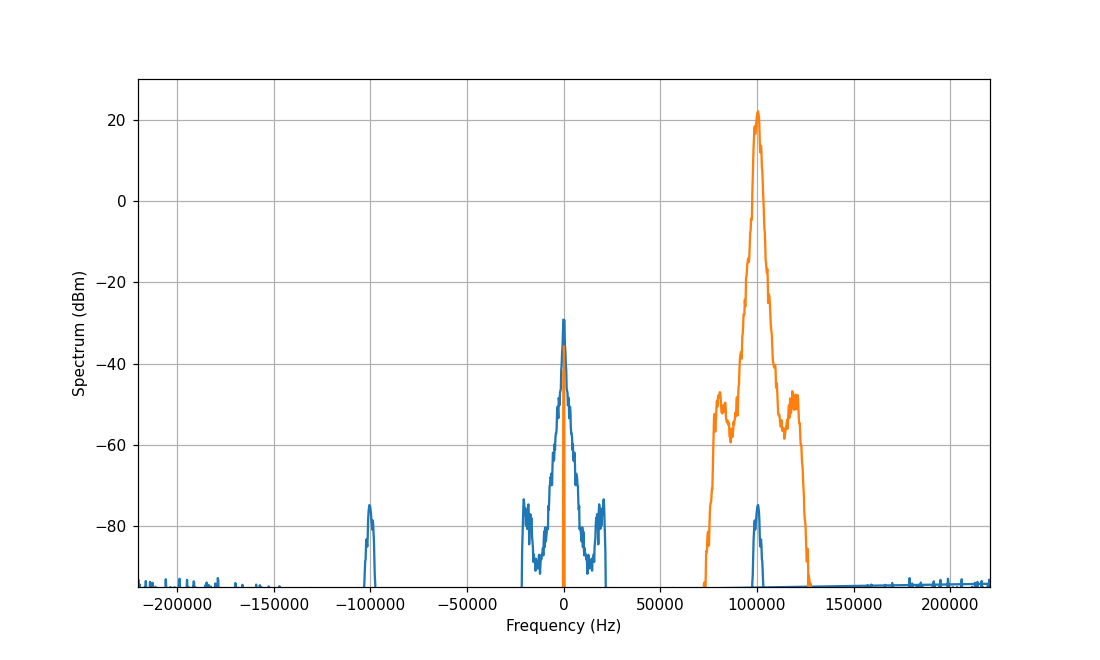

In [2]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly

signal_frame_size = 10000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500        # число обрабатываемых пачек данных
rate_ratio = 10            # коэффициент увеличения частоты дискретизации
audio_amp = 5              # коэффициент усиления аудиосигнала
mod_index = '02'           # индекс модуляции ('02' = 0.2, '06' = 0.6, '1' = 1)

# открываем файл и получаем частоту дискретизации
signal_file = wave.open(f'../../wav/Audio_FM_ModIdx_{mod_index}.wav')
signal_fs = signal_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
audio_fs = signal_fs / rate_ratio
audio_frame_size = signal_frame_size / rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-95, 30)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

# предыдущий отсчет в пачке    
last_sample = 0

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    fm_signal = signal_file.readframes(signal_frame_size)      # считываем отсчеты
    fm_signal = np.frombuffer(fm_signal, dtype=np.int16)       # преобразуем тип данных из byte в int16
    fm_signal = np.reshape(fm_signal, (-1, 2))                 # разделяем отсчеты для правого и левого канала
    fm_signal = (fm_signal[:,0] + 1j*fm_signal[:,1]) / 2**15   # выделяем комплексный сигнал и нормируем отсчеты к единице
    
    # вычисление производной от фазы
    fm_signal_delayed = np.concatenate(([last_sample], fm_signal[0:-1]))
    fm_signal_diff = fm_signal - fm_signal_delayed
    last_sample = fm_signal[-1]
    num = np.imag(fm_signal_diff * np.conj(fm_signal))
    denum = np.abs(fm_signal) ** 2
    phase_diff = num / denum
    
    # посторение спектрограмм
    signals = phase_diff, fm_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=2048) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # удаление постоянной составляющей и уменьшение частоты дискретизации
    baseband_signal = phase_diff - phase_diff.mean()
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

На спектрограмме желтым показан спектр частотно-модулированного сигнала, а синим - спектр восстановленного сообщения. На слух можно оценить, что сообщение восстанавливается без искажений.

## 3. Демодуляция FM-радио

Ниже представлен скрипт, позволяющий прослушивать FM-радио с помощью RTL-SDR. Настройка на нужную радиостанцию выполняется с помощью переменной Fc, которая задает частоту несущей. Входной сигнал проходит через фильтр нижных частот для выделения нужной радиостанции. Отфильтрованный сигнал поступает на Phase Differentiation Detector. В заключение сигнал децимируется, у него удаляется постоянная составляющая и он подается на звуковую карту. 

In [ ]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice
import math
import time

import threading
from queue import Queue

from pylab import *
from rtlsdr import RtlSdr

from scipy.signal import welch, resample_poly, firls, lfilter

fc = 106.2e6                  # частота несущей в Hz
signal_fs = 1.2e6             # частота дискретизации RTL-SDR
audio_fs = 48e3               # частота дискретизации демодулированного аудиосигнала
signal_frame_size = 1024*16   # количество отсчетов чм-сигнала, получаемых за один раз
audio_amp = 0.1               # коэффициент усиления аудиосигнала
seconds = 3                   # количество записываемых секунд

# очереди для данных
queue_sample = Queue()
queue_audio = Queue()

# рассчет числа фреймов
decimation_rate = signal_fs / audio_fs
audio_frame_size = math.ceil(signal_frame_size / decimation_rate)
frames_number = int(seconds * audio_fs * decimation_rate / signal_frame_size)

# настройки RTL SDR
sdr = RtlSdr()
sdr.sample_rate = signal_fs
sdr.center_freq = fc
sdr.freq_correction = 10
sdr.gain = 'auto'

# получение отсчетов сигнала
def get_samples():    
    while True:
        queue_sample.put(sdr.read_samples(signal_frame_size))
        
# получение отсчетов сигнала
def play_sound():
    time.sleep(3)
    frame = 0
    message = np.zeros(frames_number * audio_frame_size)
    while True:
        message[frame*audio_frame_size : audio_frame_size*(frame+1)] = queue_audio.get()
        frame += 1
        if frame == frames_number:
            sounddevice.play(message, audio_fs, blocking=False)   
            frame = 0
               
# формирование полосового фильтра
H = firls(75, (0, 110e3, 160e3, signal_fs/2), (1, 1, 0, 0), fs=signal_fs)
FIR_tap_values = np.zeros(len(H) - 1)
t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

# запускаем сбор отсчетов
get_samples_tread = threading.Thread(target=get_samples)
play_sound_tread = threading.Thread(target=play_sound)
get_samples_tread.start()
play_sound_tread.start()

last_sample = 0
while True:
    # получаем фрейм отсчетов
    fm_signal_data = queue_sample.get()
    
    # удаление постоянной составляющей
    fm_signal_data = fm_signal_data - fm_signal_data.mean()

    # фильтрация
    filtered_data, FIR_tap_values = lfilter(H, 1.0, fm_signal_data, zi=FIR_tap_values)
    
    # вычисление производной от фазы
    filtered_data_delayed = np.concatenate(([last_sample], filtered_data[0:-1]))
    filtered_data_diff = filtered_data - filtered_data_delayed
    last_sample = filtered_data[-1]
    num = np.imag(filtered_data_diff * np.conj(filtered_data))
    denum = np.abs(filtered_data) ** 2
    phase_diff = num / denum
    
    # удаление постоянной составляющей и уменьшение частоты дискретизации
    baseband_data = phase_diff - phase_diff.mean()
    audio_data = resample_poly(baseband_data, 1, int(signal_fs/audio_fs))
   
    # отправляем данные на вывод
    queue_audio.put(audio_data * audio_amp)
         

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!


## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR